<a href="https://colab.research.google.com/github/swati-k-508/food-waste-reduction/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('/content/food.csv')
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [4]:
df.tail()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
209,Venezuela (Boliv. Rep. of),116,72,2065461,16,445994,28,788407,Very Low Confidence,862,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...
211,Yemen,148,104,3026946,16,456099,28,806270,Very Low Confidence,887,Western Asia,https://www.unep.org/resources/report/unep-foo...
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
213,Zimbabwe,144,100,1458564,16,229059,28,404920,Very Low Confidence,716,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [5]:
df.shape

(214, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [7]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [8]:
df.isnull().sum()


,0
Country,0
combined figures (kg/capita/year),0
Household estimate (kg/capita/year),0
Household estimate (tonnes/year),0
Retail estimate (kg/capita/year),0
Retail estimate (tonnes/year),0
Food service estimate (kg/capita/year),0
Food service estimate (tonnes/year),0
Confidence in estimate,0
M49 code,0


In [9]:
df.columns

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')

In [10]:
from seaborn import pairplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

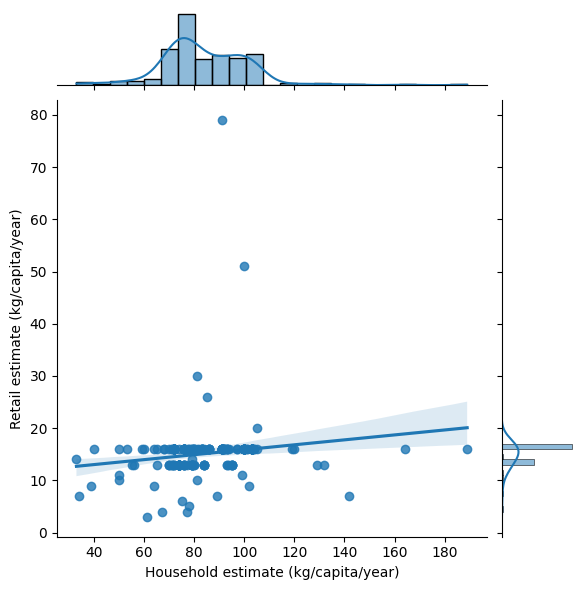

In [11]:
sns.jointplot(x='Household estimate (kg/capita/year)',y='Retail estimate (kg/capita/year)',data=df ,kind='reg')
plt.show()

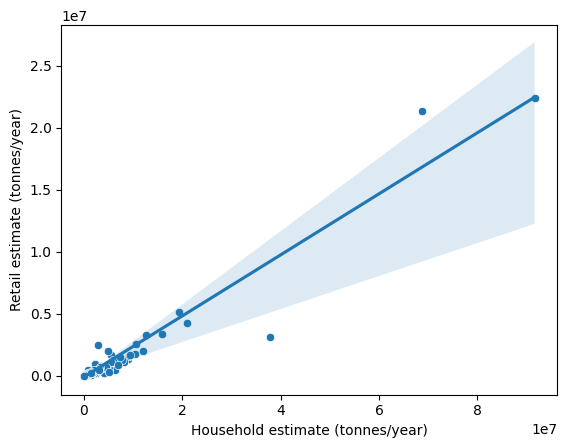

In [12]:
# Assuming 'df' is your DataFrame containing the data
sns.scatterplot(x='Household estimate (tonnes/year)', y='Retail estimate (tonnes/year)', data=df)
sns.regplot(x='Household estimate (tonnes/year)', y='Retail estimate (tonnes/year)', data=df, scatter=False)  # Adding the regression line
plt.show()

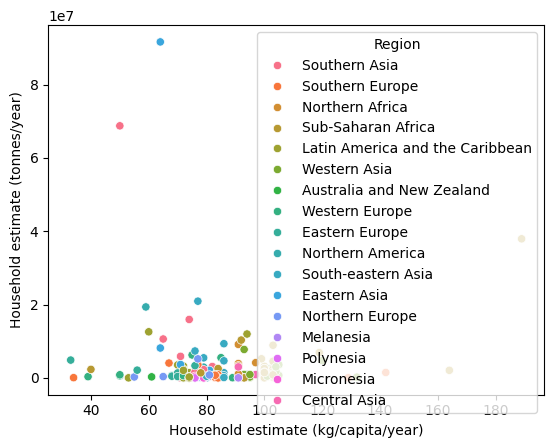

In [13]:
sns.scatterplot(x='Household estimate (kg/capita/year)',y='Household estimate (tonnes/year)',data=df, hue='Region')
plt.show()

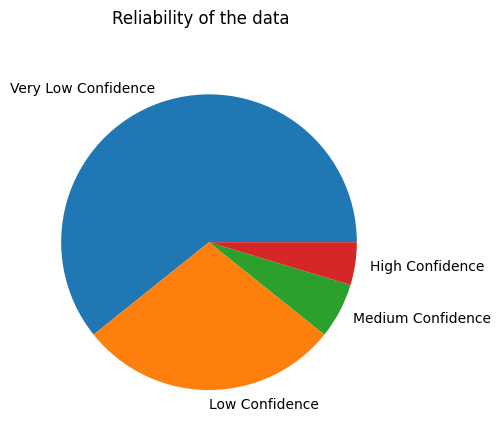

In [14]:
#Confidence level of data
df['Confidence in estimate'].value_counts().plot(kind='pie',subplots=True)
plt.suptitle('Reliability of the data')
plt.ylabel("")
plt.show()

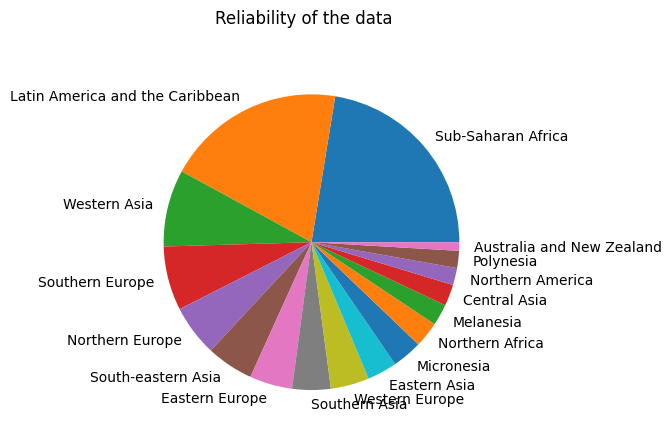

In [15]:
#Region of data
df['Region'].value_counts().plot(kind='pie',subplots=True)
plt.suptitle('Reliability of the data')
plt.ylabel("")
plt.show()


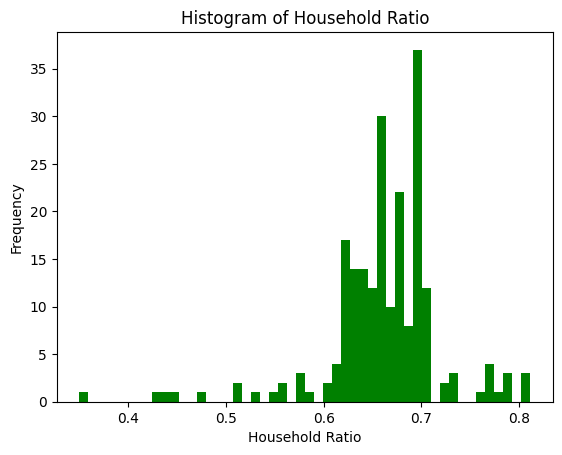

In [16]:
household_ratio = df['Household estimate (kg/capita/year)'] / df['combined figures (kg/capita/year)']
plt.hist(household_ratio, bins=50, color='green')
plt.xlabel('Household Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Household Ratio')
plt.show()


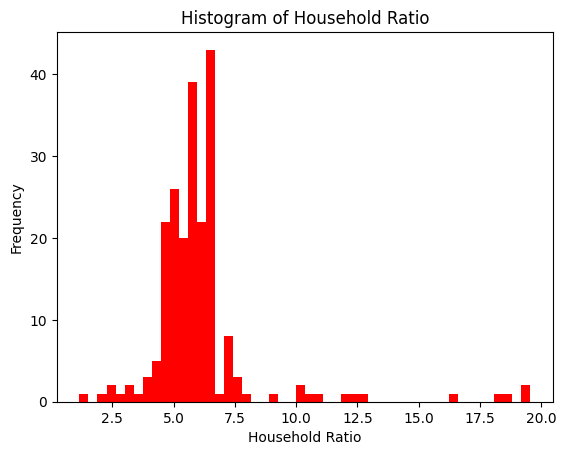

In [17]:
household_ratio = df['Household estimate (tonnes/year)'] / df['Retail estimate (tonnes/year)']
plt.hist(household_ratio, bins=50, color='red')
plt.xlabel('Household Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Household Ratio')
plt.show()

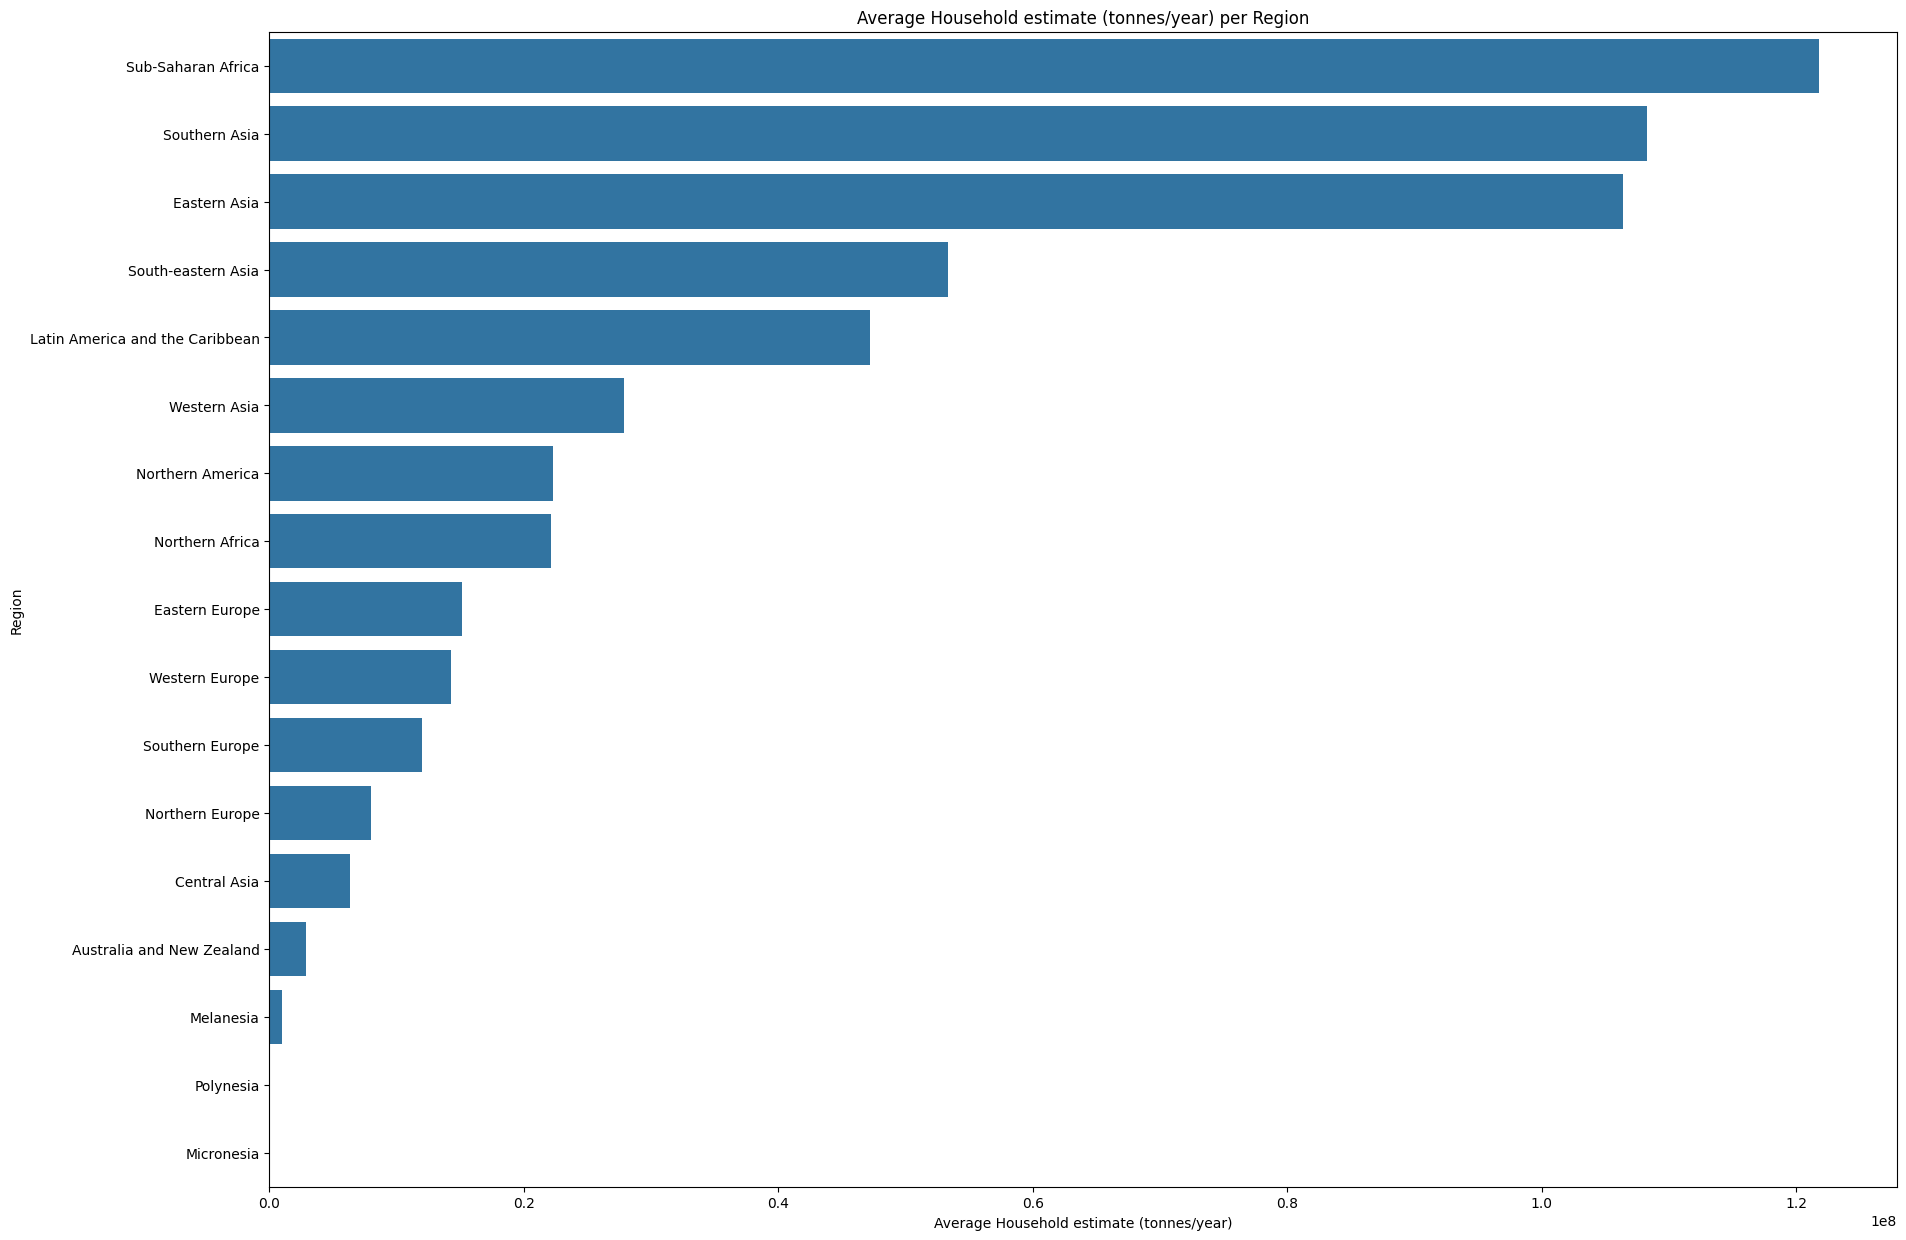

In [18]:
#Region Wise Mean Household estimate (tonnes/year)
plt.figure(figsize=(21,15))
average_wastage_household = df.groupby('Region')['Household estimate (tonnes/year)'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=average_wastage_household, y='Region', x='Household estimate (tonnes/year)')
plt.ylabel('Region')
plt.xlabel('Average Household estimate (tonnes/year)')
plt.title('Average Household estimate (tonnes/year) per Region')
plt.show()